In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
data.shape

(200, 5)

<AxesSubplot:xlabel='Age', ylabel='Density'>

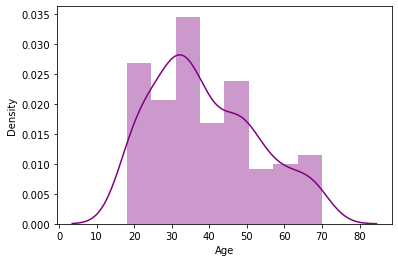

In [6]:
sns.distplot(data["Age"],color='Purple')

<AxesSubplot:xlabel='Gender', ylabel='count'>

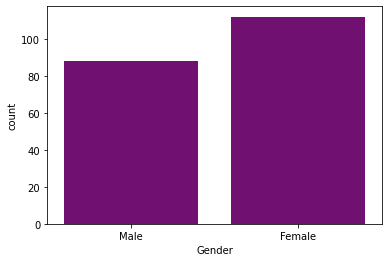

In [7]:
sns.countplot(data["Gender"],color="Purple")

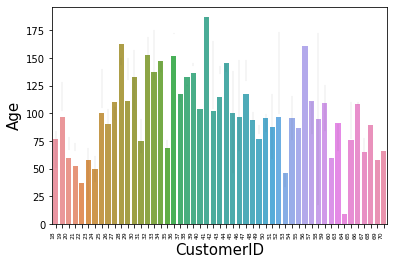

<Figure size 36000x36000 with 0 Axes>

In [8]:

sns.barplot(y= 'CustomerID',
  x= 'Age',
data =data,
           errwidth=0.1,
           n_boot=2,orient='v',)

plt.xticks(rotation=90,horizontalalignment='right',
           fontweight='light',fontsize=6)
plt.xlabel('CustomerID',size=15)
plt.ylabel('Age',size=15)

plt.figure(figsize=(500,500))
plt.show()

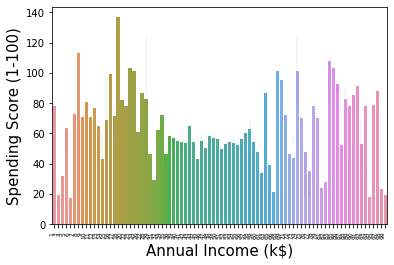

In [9]:
sns.barplot(y= 'Annual Income (k$)',
  x= 'Spending Score (1-100)',
 data =data,
           errwidth=0.1,
           n_boot=2,orient='v',)

plt.xticks(rotation=90,horizontalalignment='right',
           fontweight='light',fontsize=6)
plt.xlabel('Annual Income (k$)',size=15)
plt.ylabel('Spending Score (1-100)',size=15)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Gender'>

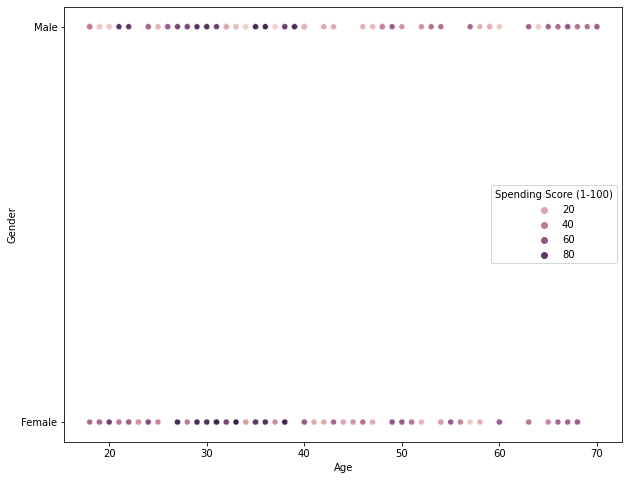

In [10]:
fig,ax=plt.subplots(figsize=(10,8))
sns.scatterplot(x=data["Age"],y=data['Gender'],hue=data["Spending Score (1-100)"])


<AxesSubplot:xlabel='Age', ylabel='Gender'>

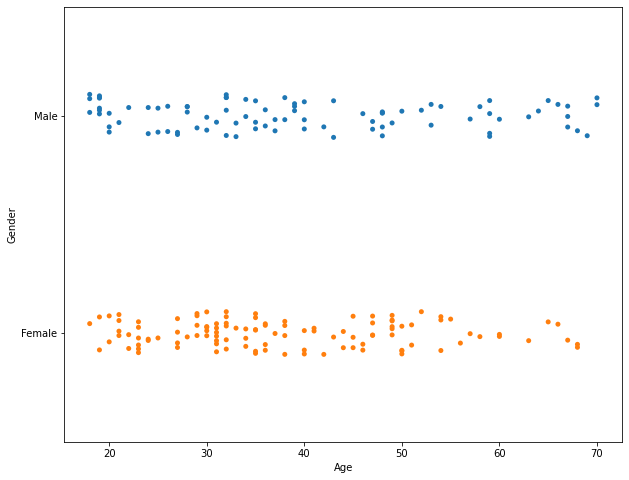

In [11]:

fig,ax=plt.subplots(figsize=(10,8))
sns.stripplot(x=data["Age"],y=data["Gender"])

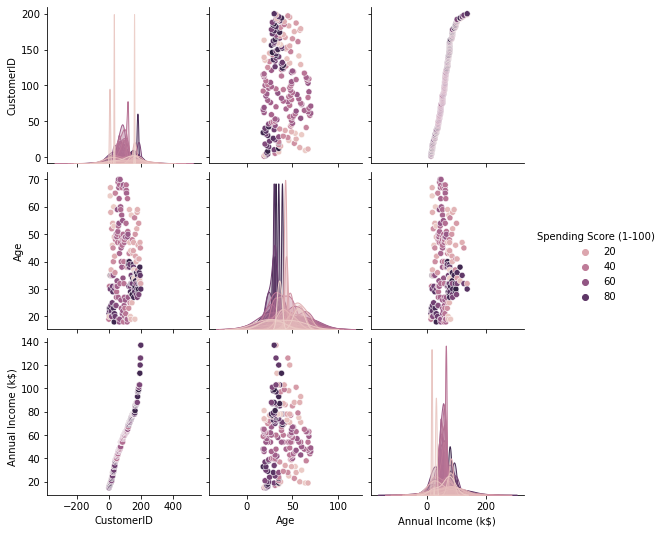

In [12]:
sns.pairplot(data,hue='Spending Score (1-100)')

<AxesSubplot:>

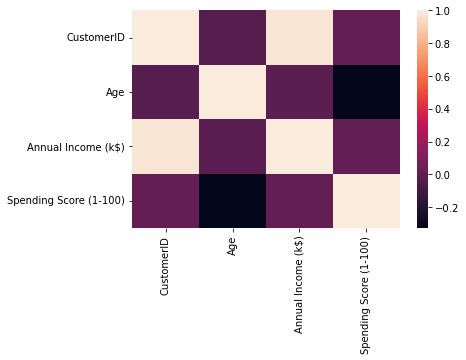

In [13]:
sns.heatmap(data.corr())

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

<AxesSubplot:>

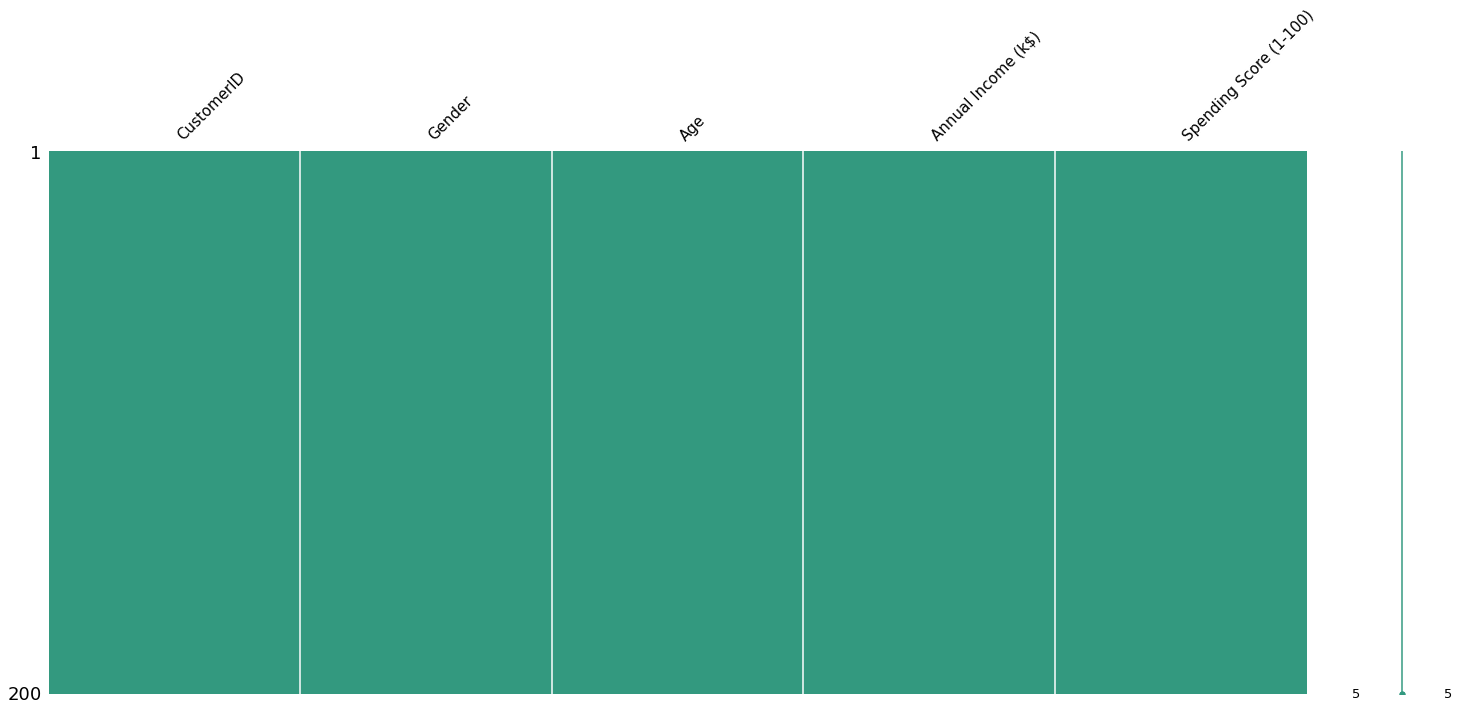

In [16]:
import missingno as msno 
msno.matrix(data,color=(0.20,0.60,0.50),fontsize=15)

In [17]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
data=data.drop(columns=["CustomerID"],axis=1)

<AxesSubplot:xlabel='Age'>

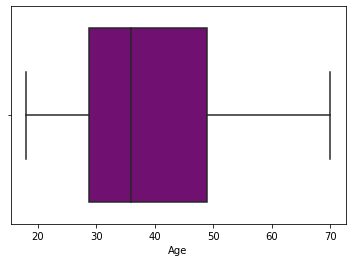

In [19]:
sns.boxplot(data.Age,color="Purple")

<AxesSubplot:xlabel='Annual Income (k$)'>

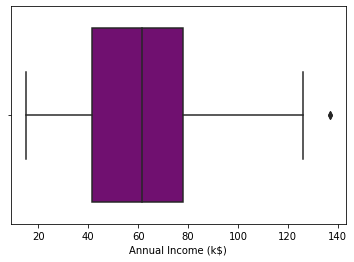

In [20]:
sns.boxplot(data['Annual Income (k$)'],color="Purple")

In [21]:
p1=data['Annual Income (k$)'].quantile(0.99)
p1

126.1099999999999

In [22]:
data=data[data['Annual Income (k$)']<=p1]

<AxesSubplot:xlabel='Annual Income (k$)'>

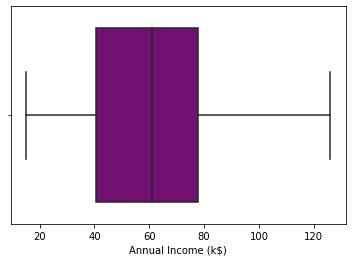

In [23]:
sns.boxplot(data['Annual Income (k$)'],color="Purple")

<AxesSubplot:xlabel='Spending Score (1-100)'>

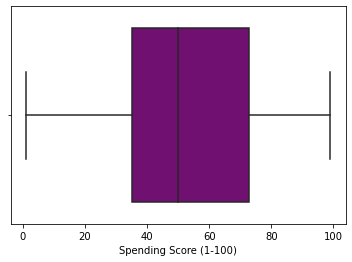

In [24]:
sns.boxplot(data['Spending Score (1-100)'],color="Purple")

In [25]:
le=LabelEncoder()

In [26]:
data.Gender=le.fit_transform(data.Gender)

In [27]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [28]:
x_scale=pd.DataFrame(scale(data),columns=data.columns)
x_scale.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.141195,-1.425414,-1.779171,-0.435989
1,1.141195,-1.282367,-1.779171,1.199413
2,-0.876275,-1.353890,-1.739447,-1.720949
3,-0.876275,-1.139319,-1.739447,1.043661
4,-0.876275,-0.567131,-1.699723,-0.397051


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data.iloc[:, -3:]
km = KMeans(n_clusters=5).fit(X)

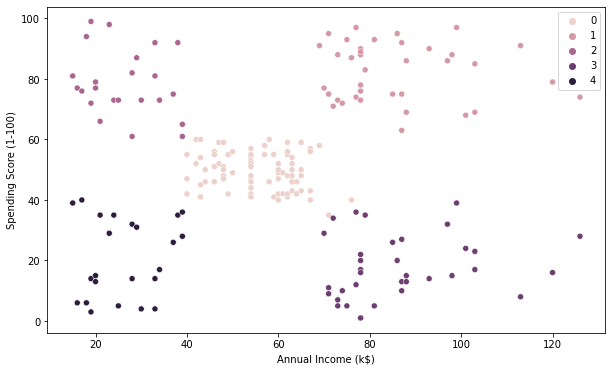

In [30]:
# K-Means visualization on pair of 2 features
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 1], X.iloc[:, 2], hue=km.labels_)
plt.show()

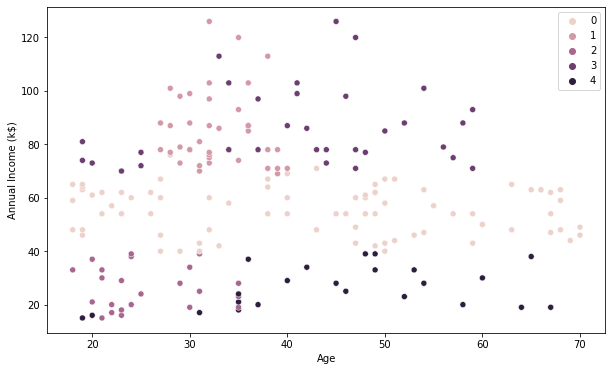

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=km.labels_)
plt.show()

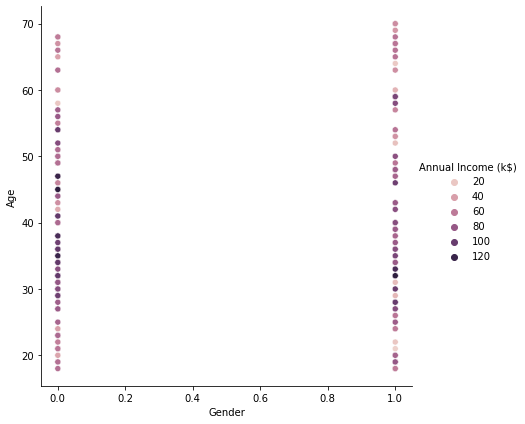

In [32]:
from sklearn.cluster import KMeans
S = data.loc[:, ["Age", "Gender", "Annual Income (k$)"]]
k = KMeans(n_clusters=6)

sns.relplot(x="Gender", y="Age", hue="Annual Income (k$)", data=S, height=6,);

In [33]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

print(x.shape)
print(y.shape)

(198, 3)
(198,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (148, 3)
 y_train.shape :  (148,)
 x_test.shape :  (50, 3)
 y_test.shape :  (50,)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2
0,1.145644,0.617109,0.037075
1,1.145644,0.546474,-0.673484
2,1.145644,-1.007516,0.668683
3,1.145644,-1.431331,0.826585
4,-0.872872,1.040925,-1.265616


In [37]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :558.564662
Mean Squared error of testing set :684.347772
